# simulate a relevant dataset

   Age  Income  Occupation  Education Location
0   18   91071    Informal    Primary  Mombasa
1   21   61622  Unemployed    Primary   Nakuru
2   21   43616      Formal  Secondary   Kisumu
3   57  126213    Informal  Secondary  Nairobi
4   27   84799      Formal  Secondary   Nakuru


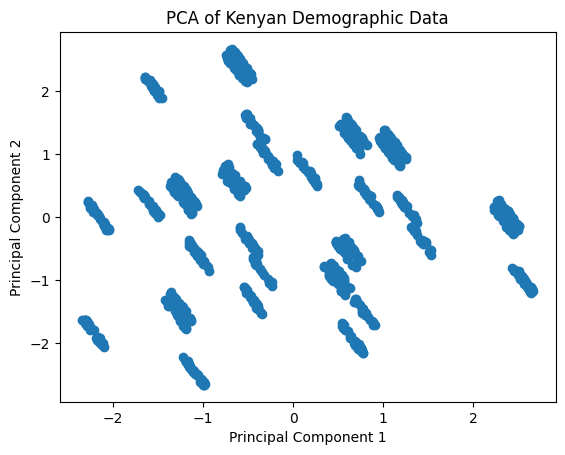

Explained Variance Ratio: [0.14016768 0.13060865]


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Simulate dataset (Kenyan demographic data)
np.random.seed(0)
data = {
 'Age': np.random.randint(18, 60, 1000),
 'Income': np.random.randint(20000, 150000, 1000),
 'Occupation': np.random.choice(['Formal', 'Informal', 'Unemployed'], 1000),
 'Education': np.random.choice(['Primary', 'Secondary', 'Tertiary'], 1000),
 'Location': np.random.choice(['Nairobi', 'Mombasa', 'Kisumu', 'Nakuru'], 1000)
}
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Occupation', 'Education', 'Location'])

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA for dimension reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Visualize the reduced data
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title('PCA of Kenyan Demographic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)